# Introduction

The [SymPy website](https://www.sympy.org/en/index.html) states that SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

In this python notebook we will look at SymPy as it relates to:

1. Setup, expressions, and methods
2. Simple mathematical operators and solutions
3. Limits
4. Derivatives
5. Basic antiderivatives (integrals)
6. Initial value problems
7. More complicated expressions
8. Definite integrals
9. Improper integrals
10. Sequences and series

Reference: [Mr. P Solver](https://www.youtube.com/watch?v=-SdIZHPuW9o&list=LL&index=1)

## 1. Import libraries and setup

* Import all libraries from SymPy
* Define symbol $x$ for use

In [36]:
import sympy as smp
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

x = smp.symbols('x')

## 2. Simple mathematical operators and solutions
Various mathematical operators can be used on defined symbols.

In [37]:
x**2

x**2

In [38]:
smp.sin(x)

sin(x)

Expressions can be saved in new variables.

In [39]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

Do operations on the new variables.

In [40]:
z = y**2
z

(x**2 + 4*x + 3)**2

We notice that the code above does not factorize. What needs to happen to the expression is decided by the different method called.
Let's factorize the equation above.

In [41]:
smp.factor(z)

(x + 1)**2*(x + 3)**2

Next, let's solve the aforementioned equation using the `solve` method.

`smp.solve(f, x)` simply finds the value(s) of $x$ that makes $f(x) = 0$.

In [42]:
smp.solve(z, x)

[-3, -1]

In [43]:
smp.solve(smp.sin(x), x)

[0, pi]

**Good Practice:** If you know that the variable $x$ is real (and in some cases non-negatie) it is good to specify this when the variable is defined.

In [44]:
x = smp.symbols('x')
smp.solve(x**2 + 1, x)

[-I, I]

In [13]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x**2 + 1, x)

[]

We can also define multible symbols/variables at the same time.

In [45]:
x, y, z = smp.symbols('x y z')    # this works too smp.symbols('x,y,z')
F = x**2 + smp.sin(z) * y
F

x**2 + y*sin(z)

We can also solve multivariate expressions, specifically which variable to solve. In each case, $F=0$ is being solved for.

In [46]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [47]:
y_sols = smp.solve(F, y)
y_sols

[-x**2/sin(z)]

In [48]:
z_sols = smp.solve(F, z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, converting a SumPy expression into a numerical function so that it can be plotted.

In [49]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [50]:
expr_f = smp.lambdify([x,y], expr) # lambdify - Convert a SymPy expression into a function that allows for fast numeric evaluation.
expr_f(1, 2) # lambdified function at a certian point

3.665191429188092

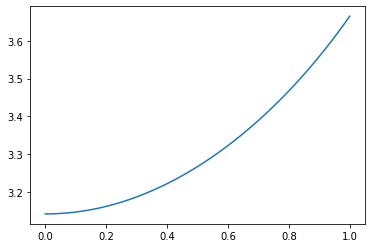

In [52]:
x_num = np.linspace(0, 1, 100)
y_num = 2
plt.plot(x_num, expr_f(x_num, y_num))
plt.show()

For multivariate expressions, values can be substituted in as well.

In [53]:
F

x**2 + y*sin(z)

Substitute $y$ with $cos(z)$ and $z$ with $y$.

In [55]:
F.subs([(y, smp.cos(z)), (z, y)]) # but it's not assigned?

x**2 + sin(y)*cos(y)

3. Limits

$$\lim_{x \to \pi}\sin\left(\frac{x}{2}+\sin(x)\right)$$

In [56]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

$$\lim_{x \to 0^+}\frac{2e^{1/x}}{e^{1/x}+1}$$

In [58]:
smp.limit((2*smp.exp(1/x))/(smp.exp(1/x)+1), x, 0, dir='+')

2

$$\lim_{x \to 0^-}\frac{2e^{1/x}}{e^{1/x}+1}$$

In [59]:
smp.limit((2*smp.exp(1/x))/(smp.exp(1/x)+1), z=x, z0=0, dir='-')

0

$$\lim_{x \to \infty}\frac{\cos{x}-1}{x}$$

In [61]:
smp.limit((smp.cos(x)-1)/(x), z=x, z0=smp.oo)

0

## 4. Derivatives
$$\frac{d}{dx}\left(\frac{1+\sin{x}}{1-\cos{x}}\right)^2$$

In [65]:
smp.diff(((1+smp.sin(x))/(1-smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

$$\frac{d}{dx}\left(\log_{5}{x}\right)^{\frac{x}{2}}$$

In [66]:
smp.diff((smp.log(x,5))**(x/2))

(log(x)/log(5))**(x/2)*(log(log(x)/log(5))/2 + 1/(2*log(x)))

$$\frac{d}{dx}f\left(x+g(x)\right)$$

In [71]:
f, g = smp.symbols("f g", cls=smp.Function)
g = g(x)
f = f(x+g)

In [72]:
smp.diff(f, x)

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

## 5. Basic antiderivitavies (integrals)
$$\int\csc(x)\cot(x)dx$$

In [73]:
smp.integrate((smp.csc(x)*smp.cot(x)), x)

-1/sin(x)

$$\int\left(\frac{2}{\sqrt{1-x^2}}-\frac{1}{x^{1/4}}\right)dx$$

In [76]:
smp.integrate((2/smp.sqrt(1-x**2))-(1/x**smp.Rational(1,4)),x)

-4*x**(3/4)/3 + 2*asin(x)

## 6. Initial value problems
Given $\frac{dy}{dx}=8x+\csc^2(x)$ with $y(\pi/2)=-7$

Solve for $y(x)$

In [78]:
integral = smp.integrate(8*x+smp.csc(x)**2, x)

In [79]:
c = - integral.subs(x, smp.pi/2) - 7
y = integral + c

In [80]:
y.subs(x, smp.pi/2)

-7

In [81]:
y

4*x**2 - pi**2 - 7 - cos(x)/sin(x)

## 7. More complicated expressions
$$\int\frac{(1+\sqrt{x})^{1/3}}{\sqrt{x}}dx$$

In [85]:
smp.integrate(((1+smp.sqrt(x))**smp.Rational(1,3))/(smp.sqrt(x)), x)

3*sqrt(x)*(sqrt(x) + 1)**(1/3)/2 + 3*(sqrt(x) + 1)**(1/3)/2

$$$$

$$\int x(1-x^2)^{1/4}dx$$

In [83]:
smp.integrate(x*(1-x**2)**smp.Rational(1,4), x)

2*x**2*(1 - x**2)**(1/4)/5 - 2*(1 - x**2)**(1/4)/5

$$\int\frac{(2x-1)\cos{(\sqrt{3(2x-1)^2+6})}}{\sqrt{3(2x-1)^2+6}}dx$$

In [84]:
smp.integrate((2*x-1)*(smp.cos(smp.sqrt(3*(2*x-1)**2+6)))/(smp.sqrt(3*(2*x-1)**2+6)), x)

sin(sqrt(3*(2*x - 1)**2 + 6))/6

## 9. Definite integrals
$$\int_0^{ln(4)}\frac{e^x}{\sqrt{e^{2x}+9}}dx$$

In [86]:
smp.integrate((smp.exp(x))/(smp.sqrt(smp.exp(2*x)+9)), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

$$\int_1^tx^{10}e^{x}dx$$

In [88]:
t = smp.symbols('t')
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## 10. Improper integrals
$$\int_0^\infty\frac{16\tan^{-1}{(x)}}{1+x^2}dx$$

In [89]:
smp.integrate((16*smp.atan(x))/(1+x**2), (x, 0, smp.oo))

2*pi**2

## 11. Sequences and series
$$\sum_{n=0}^{\infty}\frac{6}{4^n}$$

In [91]:
n = smp.symbols('n')

In [92]:
smp.summation(6/4**n, (n, 0, smp.oo))

8

$$\sum_{n=0}^{\infty}\frac{2^{n+1}}{5^n}$$

In [93]:
smp.summation((2**(n+1))/(5**n), (n, 0, smp.oo))

10/3

$$\sum_{n=0}^{\infty}\frac{tan^{-1}(n)}{n^{1.1}}$$

In [96]:
smp.summation(smp.atan(n)/n**(1.1), (n, 0, smp.oo)).doit()

Sum(atan(n)/n**1.1, (n, 0, oo))

$$\sum_{n=0}^{\infty}\frac{1+\cos{x}}{n^2}$$

In [100]:
smp.summation((1+smp.cos(n))/n**2, (n, 0, smp.oo)).doit()

Sum((cos(n) + 1)/n**2, (n, 0, oo))